# Module 5.4 - Random Structural Break Timing
## Objective
- Regime switch happens at a random time
- It may revert back later
- Expectancy changes between regimes

We want to study:

- Detection difficulty
- Monte Carlo variability
- Hindsight clarity vs real-time ambiguity

## Simulation Design

- Regime A: Positive expectancy (edge present)
- Regime B: Zero or negative expectancy (edge disappears)
- Random switch point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

n_trades = 1000

In [2]:
def simulate_random_regime(n_trades = n_trades):

    # random breakpoints
    break1 = np.random.randint(200, 400)
    break2 = np.random.randint(break1+100, 900)

    returns = []

    for i in range(n_trades):

        # Regime A(edge present)
        if i < break1 or i > break2:
            p = 0.55
            R = 1
        # Regime B (edge disappears)
        else: 
            p = 0.50
            R = 1

        r = R if np.random.rand() < p else -R
        returns.append(r)

    equity = np.cumsum(returns)
    return equity, np.array(returns), break1, break2


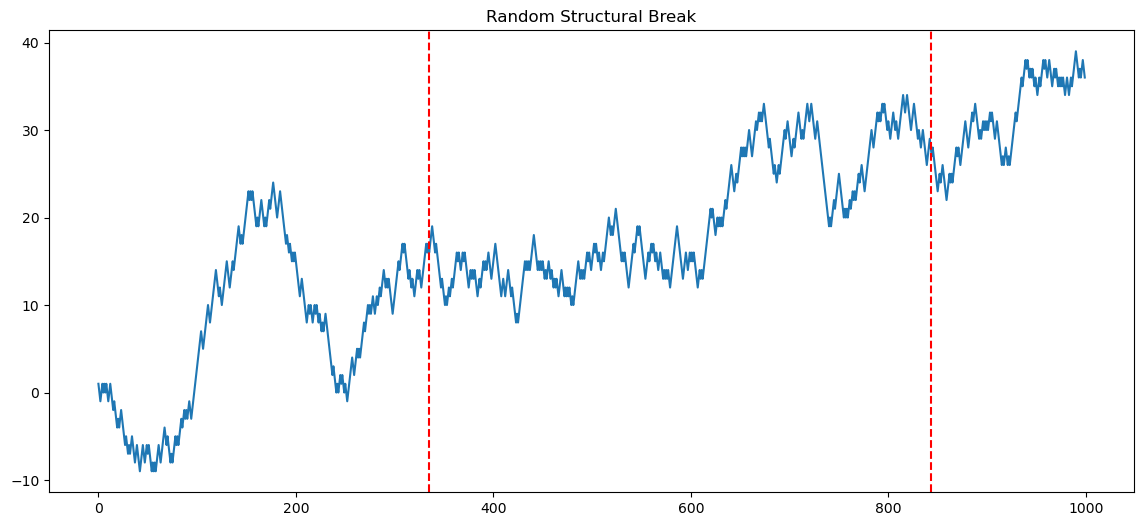

In [3]:
equity, returns, b1, b2 = simulate_random_regime()

plt.figure(figsize=(14,6))
plt.plot(equity)
plt.axvline(b1, color='red', linestyle='--')
plt.axvline(b2, color='red', linestyle='--')
plt.title("Random Structural Break")
plt.show()


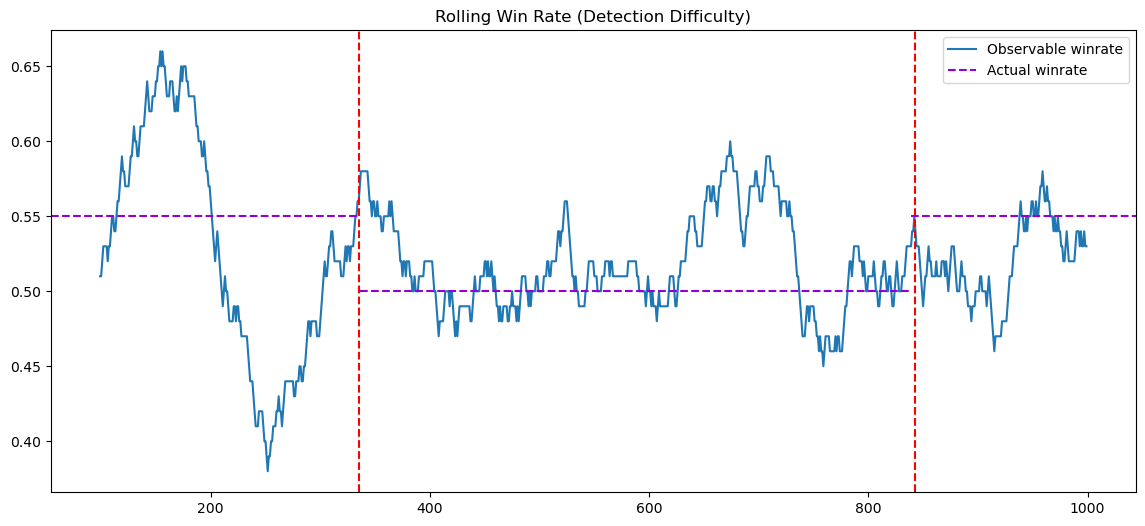

In [4]:
def rolling_winrate(returns, window=100):
    binary = returns = (returns > 0).astype(int)
    rolling = sliding_window_view(binary, window).mean(axis = 1)
    
    # Prepend NaNs for alignment
    padding = np.full(window - 1, np.nan)
    result = np.concatenate([padding, rolling])
    
    return result

wr = rolling_winrate(returns, window=100)

plt.figure(figsize=(14,6))
plt.plot(wr, label = 'Observable winrate')
plt.axvline(b1, color='red', linestyle='--')
plt.axvline(b2, color='red', linestyle='--')
plt.title("Rolling Win Rate (Detection Difficulty)")

bp1 = b1/n_trades - 0.05
bp2 = b2/n_trades - 0.05
plt.axhline(y = 0.55,xmax = bp1 , ls = "--", c = 'darkviolet', label = 'Actual winrate')
plt.axhline(y = 0.55,xmin = bp2, xmax = 1 , ls = "--", c = 'darkviolet')
plt.axhline(y = 0.50,xmin = bp1, xmax = bp2, ls = '--', c = 'darkviolet')

plt.legend()
plt.show()


# Observation
When regime breaks occur at random and may revert later:

- Performance degradation is not immediately detectable.
- Rolling win rate lags true regime change.
- Noise often masks structural shifts.
- Temporary recovery can falsely suggest edge persistence.
- Short samples can falsely suggest edge loss.

In real time:

- Regime shifts are statistically ambiguous.
- Variance and structural change are difficult to distinguish.
- Confirmation requires large sample sizes.

In hindsight:

- The break appears clean and obvious.
- The equity curve visually aligns with regime boundaries.
- Ambiguity disappears because full information is available.

Conclusion:

Regime breaks are obvious only after sufficient data accumulates.    
Performance evaluation under randomness is path-dependent and unstable.   
Real-time detection of structural change is inherently delayed and probabilistic, not binary.    